# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat, lng in lat_lngs:
    city = citipy.nearest_city(lat, lng).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = time.time()

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | sangaria
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | anchorage
Processing Record 7 of Set 1 | molde
Processing Record 8 of Set 1 | hammerfest
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | las animas
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | road town
Processing Record 13 of Set 1 | jinghong
Processing Record 14 of Set 1 | woodlake
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | high springs
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | port saint john's
Processing Record 19 of Set 1 | castillos
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | port blair
Processing Record 22 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,25.86,93,5,3.13,EC,1.711935e+09
1,tiksi,71.6872,128.8694,-9.36,84,100,9.53,RU,1.711935e+09
2,sangaria,29.8000,74.4500,20.25,40,84,2.11,IN,1.711935e+09
3,edinburgh of the seven seas,-37.0676,-12.3116,17.15,74,100,6.28,SH,1.711935e+09
4,port-aux-francais,-49.3500,70.2167,4.94,80,100,9.49,TF,1.711935e+09


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,25.86,93,5,3.13,EC,1.711935e+09
1,tiksi,71.6872,128.8694,-9.36,84,100,9.53,RU,1.711935e+09
2,sangaria,29.8000,74.4500,20.25,40,84,2.11,IN,1.711935e+09
3,edinburgh of the seven seas,-37.0676,-12.3116,17.15,74,100,6.28,SH,1.711935e+09
4,port-aux-francais,-49.3500,70.2167,4.94,80,100,9.49,TF,1.711935e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

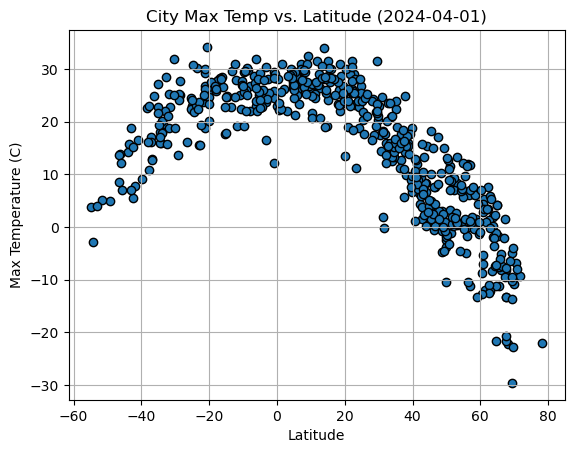

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Temp vs. Latitude (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

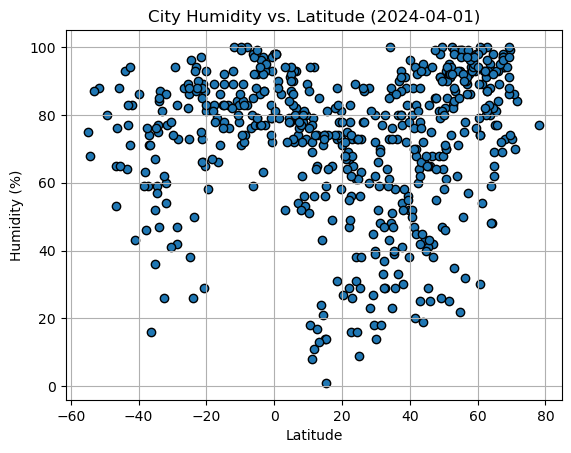

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

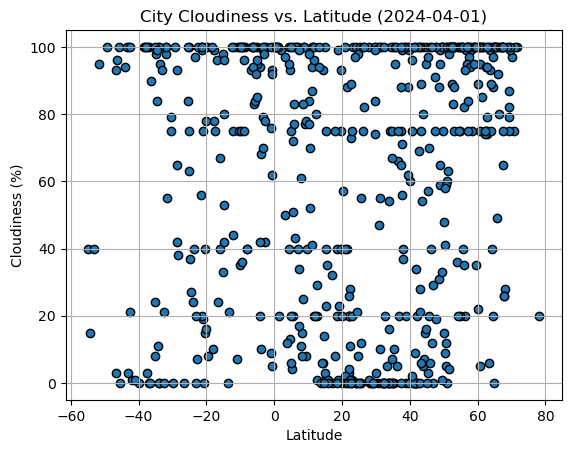

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

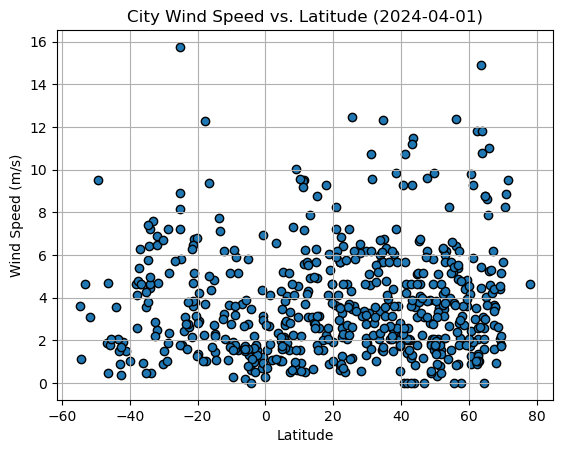

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [92]:
# Define a function to create Linear Regression plots
def linear_regression(data, x, y, title="", text_x=0, text_y=0, text_size=15):
    lr = linregress(data[x], data[y])
    print(f"r-value = {lr.rvalue}")
    plt.scatter(data[x], data[y])
    plt.title(title)
    plt.xlabel(x +"itude")
    plt.ylabel(y)
    plt.plot(data[x], lr.slope*data[x] + lr.intercept, color='r')
    plt.text(text_x,text_y,"y = " + str(round(lr.slope, 2)) + "x + " + str(round(lr.intercept, 2)), fontsize = text_size, color='r')
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,-9.36,84,100,9.53,RU,1.711935e+09
2,sangaria,29.8000,74.4500,20.25,40,84,2.11,IN,1.711935e+09
5,anchorage,61.2181,-149.9003,5.38,54,100,9.26,US,1.711935e+09
6,molde,62.7375,7.1591,5.95,100,75,2.06,NO,1.711935e+09
7,hammerfest,70.6634,23.6821,-6.75,86,75,8.23,NO,1.711935e+09


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,25.86,93,5,3.13,EC,1.711935e+09
3,edinburgh of the seven seas,-37.0676,-12.3116,17.15,74,100,6.28,SH,1.711935e+09
4,port-aux-francais,-49.3500,70.2167,4.94,80,100,9.49,TF,1.711935e+09
8,port alfred,-33.5906,26.8910,19.54,87,95,0.45,ZA,1.711935e+09
9,las animas,-39.8087,-73.2182,9.08,86,0,1.01,CL,1.711935e+09


###  Temperature vs. Latitude Linear Regression Plot

r-value = -0.9020098039857362


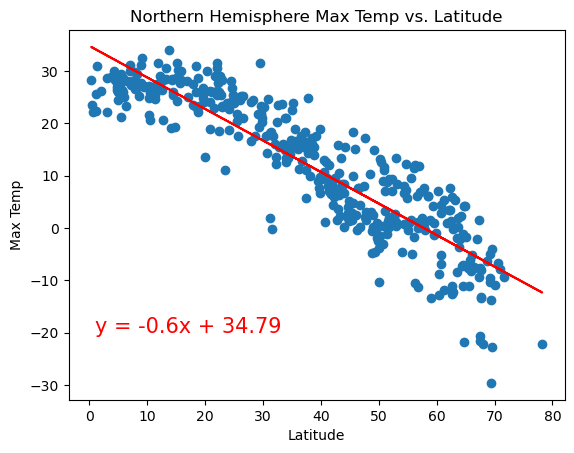

In [93]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Max Temp", title="Northern Hemisphere Max Temp vs. Latitude", text_x=1, text_y=-20)

r-value = 0.6916323046137933


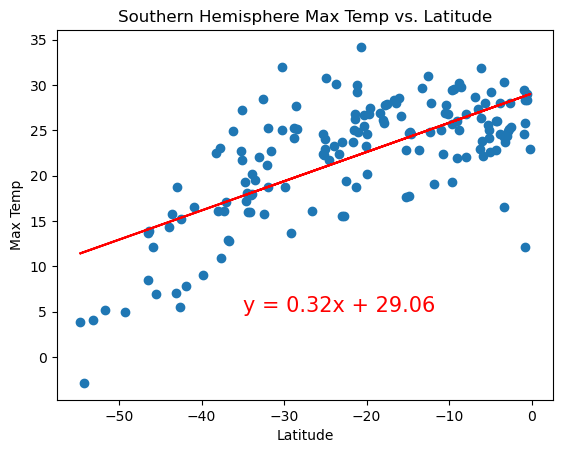

In [94]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Max Temp", title="Southern Hemisphere Max Temp vs. Latitude", text_x=-35, text_y=5)

**Discussion about the linear relationship:** 

Looking at the r-values, there is a very strong negative correlation (-0.90) and a strong positive correlation (0.70) for the northern and southern hemispheres respectively. As the equator (latitude 0) separates the northern and southern hemisphere, it can be seen that as it gets closer to latitude 0, the temperature increases. In the northern hemisphere, the temperature change is, on average, higher per degree of latitude (0.6) than the southern hemisphere (0.32).

### Humidity vs. Latitude Linear Regression Plot

r-value = 0.26723231062517305


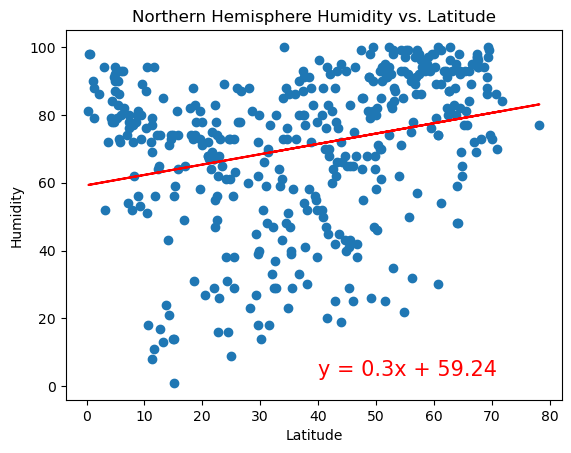

In [95]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Humidity", title="Northern Hemisphere Humidity vs. Latitude", text_x=40, text_y=3)

r-value = 0.3744168698692097


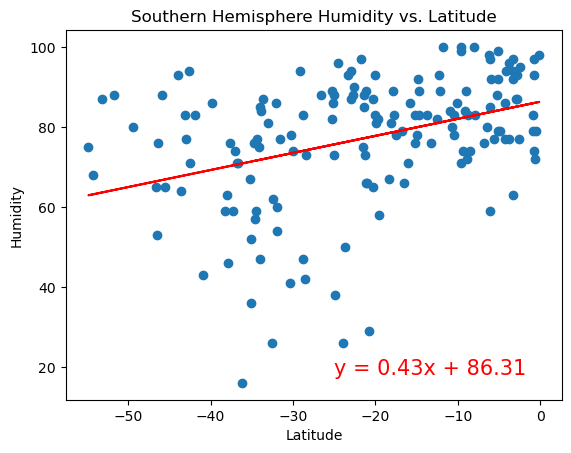

In [96]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Humidity", title="Southern Hemisphere Humidity vs. Latitude", text_x=-25, text_y=18)

**Discussion about the linear relationship:** 

The r-values for both the hemispheres (0.26 and 0.37) shows that the correlation between latitude and humidity are weak. However, the positive trends of both hemispheres show that the humidity increases as it goes further to the north. As the correlation is weak, the weather pattern cannot be explained as a trend.

### Cloudiness vs. Latitude Linear Regression Plot

r-value = 0.26371424907437624


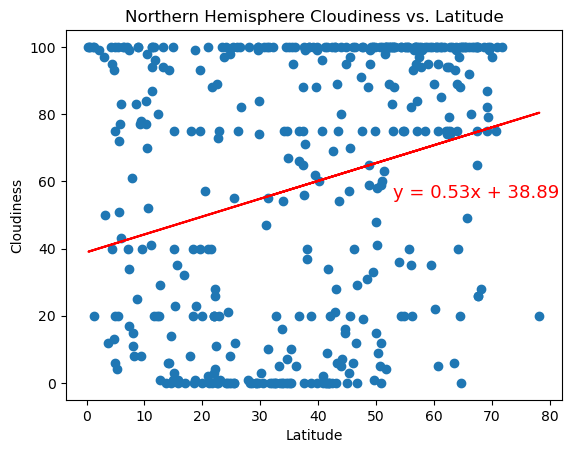

In [97]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Cloudiness", title="Northern Hemisphere Cloudiness vs. Latitude", text_x=53, text_y=55, text_size=13)

r-value = 0.1855704390559028


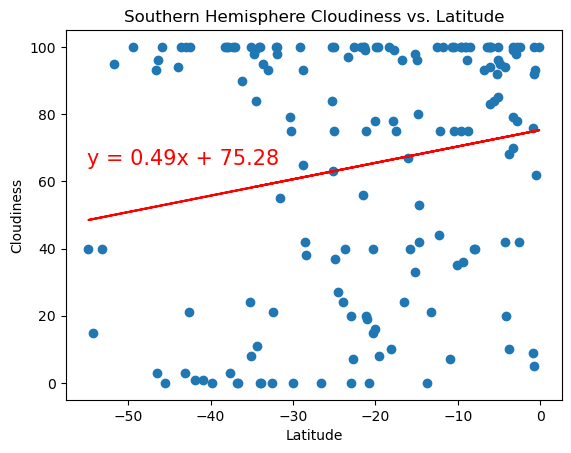

In [98]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Cloudiness", title="Southern Hemisphere Cloudiness vs. Latitude", text_x=-55, text_y=65)

**Discussion about the linear relationship:**

The r-values of the northern (0.26) and southern (0.18) hemispheres indicate that the correlation between cloudiness and latitude is weak. The positive trends does show that there are more clouds as the latitude increases, however, it is not a strong correlation and does explain weather patterns.

### Wind Speed vs. Latitude Linear Regression Plot

r-value = 0.09142537739047282


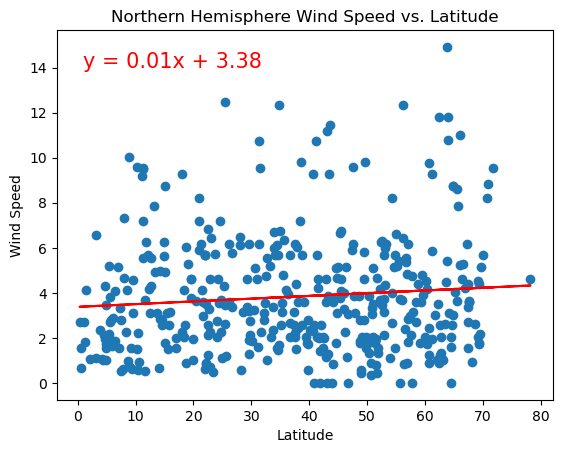

In [99]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Wind Speed", title="Northern Hemisphere Wind Speed vs. Latitude", text_x=1, text_y=14)

r-value = -0.1810960212147017


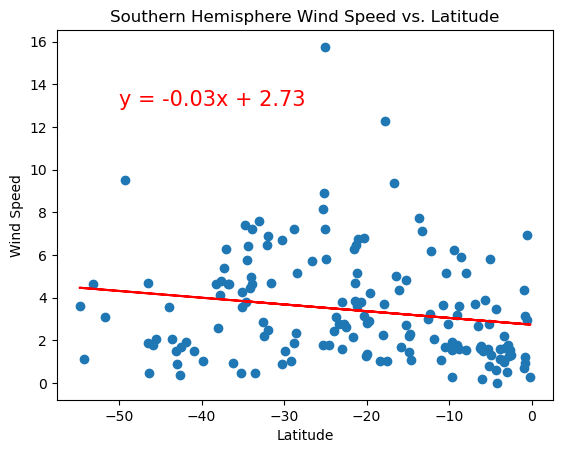

In [100]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Wind Speed", title="Southern Hemisphere Wind Speed vs. Latitude", text_x=-50, text_y=13)

**Discussion about the linear relationship:** 

The r-values for the northern (0.09) and southern (-0.18) hemisperes indicate that there is very weak or no correlation between wind speed and latitude. However, the positive trend of the northern hemisphere and negative trend of the southern hemisphere indicates that the further away from the equator (latitude 0), the higher the wind speed.